In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime 


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
news_outlets =('@BBC', '@CBS', '@CNN', '@Fox', '@nytimes' )

sentement_scoresL=[] # hold the observations
num=0

for news_outlet in news_outlets:



    # Create a loop to iteratively run API requests
   
   for tweet_page in range(1,10):

       # Get all tweets from home feed (for each page specified)
       public_tweets = api.user_timeline(news_outlet, page=tweet_page)

       # Loop through all tweets
       for tweet in public_tweets:
           
           



            num+=1
            # Print Tweet
            #print(tweet["text"])
           
            #extract date
            tweetDate      = tweet['created_at']
            tweetTextThis  = tweet["text"]
           
            compound=analyzer.polarity_scores(tweet["text"])['compound']
           
            ThisTweet = {
               
                'Tweet Number': num,
                'News Outlet' : news_outlet,
                'Score'       : compound,
                'Date'        : tweetDate,
                'Tweet Text'  : tweetTextThis
               
                }

           
            sentement_scoresL.append(ThisTweet)
           
           

df=pd.DataFrame(sentement_scoresL)
df.head()        


#dfBBC = df[df['News Outlet'] == 'BBC']

,Date,News Outlet,Score,Tweet Number,Tweet Text
0,Mon Jul 23 20:03:06 +0000 2018,@BBC,0.0000,1,Film-maker Mo Naqvi attempts to decide who to ...
1,Mon Jul 23 18:02:06 +0000 2018,@BBC,0.0000,2,💈❤️ Meet the barber tackling mental health one...
2,Mon Jul 23 17:31:04 +0000 2018,@BBC,0.0000,3,Follow the transportation of a herd of elephan...
3,Mon Jul 23 16:03:04 +0000 2018,@BBC,0.4939,4,🐶 Hearing dogs can save a life. https://t.co/b...
4,Mon Jul 23 15:31:24 +0000 2018,@BBC,0.0000,5,RT @cbbc: Andy Samberg &amp; @selenagomez talk...


In [3]:
df.head()

,Date,News Outlet,Score,Tweet Number,Tweet Text
0,Mon Jul 23 20:03:06 +0000 2018,@BBC,0.0000,1,Film-maker Mo Naqvi attempts to decide who to ...
1,Mon Jul 23 18:02:06 +0000 2018,@BBC,0.0000,2,💈❤️ Meet the barber tackling mental health one...
2,Mon Jul 23 17:31:04 +0000 2018,@BBC,0.0000,3,Follow the transportation of a herd of elephan...
3,Mon Jul 23 16:03:04 +0000 2018,@BBC,0.4939,4,🐶 Hearing dogs can save a life. https://t.co/b...
4,Mon Jul 23 15:31:24 +0000 2018,@BBC,0.0000,5,RT @cbbc: Andy Samberg &amp; @selenagomez talk...


In [4]:
#BBC dataframe
dfBBC = df[df['News Outlet'] == '@BBC']
dfBCC = dfBBC.iloc[0:100]
#dfBBC.head()
print(len(dfBBC))

180


In [5]:
#CBS dataframe
dfCBS = df[df['News Outlet'] == '@CBS']
dfCBS = dfCBS.iloc[0:100]
#dfCBS.head() 

print(len(dfCBS))

100


In [6]:
#CNN dataframe
dfCNN = df[df['News Outlet'] == '@CNN']
dfCNN = dfCNN.iloc[0:100]
dfCNN.head()

,Date,News Outlet,Score,Tweet Number,Tweet Text
360,Tue Jul 24 00:01:08 +0000 2018,@CNN,0.0000,361,Chick-fil-A will be testing out a meal kit ser...
361,Mon Jul 23 23:51:03 +0000 2018,@CNN,0.1027,362,"$500,000 has been raised in two days to help a..."
362,Mon Jul 23 23:46:00 +0000 2018,@CNN,0.0000,363,Watch the moment thousands of sardines jumped ...
363,Mon Jul 23 23:41:04 +0000 2018,@CNN,-0.4019,364,Fact-checking Trump's weekend of misleading FI...
364,Mon Jul 23 23:36:03 +0000 2018,@CNN,-0.8225,365,A 15-year-old girl who was repeatedly raped by...


In [7]:
#Fox dataframe
dfFox = df[df['News Outlet'] == '@Fox']
dfFox = dfFox.iloc[0:100]
dfFox.head()

,Date,News Outlet,Score,Tweet Number,Tweet Text
540,Thu Jul 19 22:21:10 +0000 2018,@Fox,0.6924,541,One of the reasons I’m so excited to be a part...
541,Wed Jul 11 21:30:06 +0000 2018,@Fox,0.0000,542,More Boston snaps. https://t.co/NCcWPSV8yX
542,Mon Jul 09 23:35:49 +0000 2018,@Fox,0.4926,543,"RT @helpscout: Said it once, we'll keep saying..."
543,Mon Jul 09 20:12:02 +0000 2018,@Fox,-0.0516,544,"@mattopsahl lol, offensive"
544,Mon Jul 09 19:43:29 +0000 2018,@Fox,0.5707,545,"@tompedals yay, hello, hi! 👋🏻"


In [84]:
#nytimes dataframe
dfnytimes = df[df['News Outlet'] == '@nytimes']
dfnytimes = dfnytimes.iloc[0:100]
#dfnytimes.head()

#counter = 1

#for i in dfnytimes['Tweet Number']:
    #dfnytimes['Tweet Number'] = 1

#Dfnytimes = dfnytimes


#for i in Dfnytimes['Tweet Number']:
    #i = i + counter

#for i in Dfnytimes['Tweet Number']:
    #i = i + counter
    
    
    
#dfnytimes.head()

#count = 1
#counter_count = []

#for i in dfnytimes['Tweet Number']:
   # counter_count = []
    #i = i + count
    #counter_count.append(count)
    
        #for i in dfnytimes['TweetNumber']:
           # i = counter_count
            
            




    

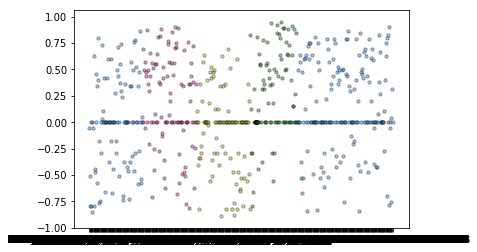

In [86]:
#Start Scatter
# Build the scatter plots for each city types

dotSize=10
alphaC=.40
dotSizeL=30

# Incorporate the other graph properties
#Urban
plt.scatter(dfnytimes['Date'], 
            dfnytimes['Score'], 
            s=dotSize, c="DodgerBlue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Urban")

#Suburban
plt.scatter(dfFox['Date'], 
            dfFox['Score'], 
            s=dotSize, c="MediumVioletRed", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Suburban")

plt.scatter(dfCNN['Date'], 
            dfCNN['Score'], 
            s=dotSize, c="y", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Urban")

plt.scatter(dfCBS['Date'], 
            dfCBS['Score'], 
            s=dotSize, c="g", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Urban")

plt.scatter(dfBBC['Date'], 
            dfBBC['Score'], 
            s=dotSize, c="DodgerBlue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=alphaC, label="Urban")


plt.show()


([<matplotlib.axis.XTick at 0x11acdbc88>,
 <a list of 5 Text xticklabel objects>)

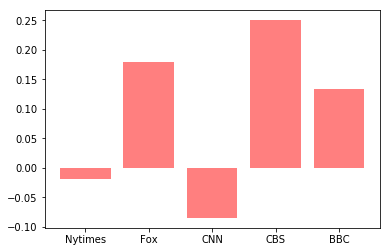

In [74]:
sites = [np.mean(dfnytimes['Score']), np.mean(dfFox['Score']), np.mean(dfCNN['Score']), np.mean(dfCBS['Score']), np.mean(dfBBC['Score']) ]
x_axis = np.arange(len(sites))     

plt.bar(x_axis, sites, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nytimes", "Fox",'CNN', "CBS", "BBC"])
